<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/ML_05_Linear_Regression_Implementation(Part3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model

We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

# Definition & Working principle
**Let's build model using Linear regression.**

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square errror  (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

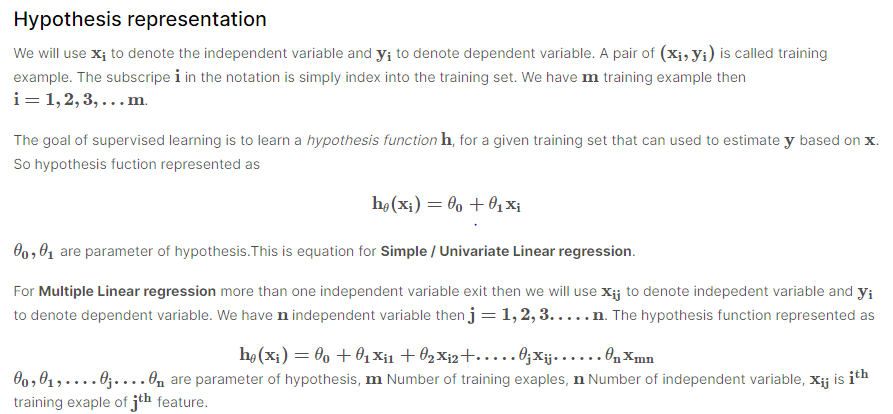

# Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset

In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (1338, 7)



In [ ]:
#Lets look into top few rows and columns in the dataset
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


##**Converting categorical data to numerical data**

In [ ]:
df['smoker'].unique()  

array(['yes', 'no'], dtype=object)

In [ ]:
df.smoker=df.smoker.map({'yes':1,'no':0}) ## smoker=1,non-smoker=0

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.region=df.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [ ]:
df.sex=pd.get_dummies(df.sex,drop_first=True)  ## onehot encoding is done,female is 0 and male is 1

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


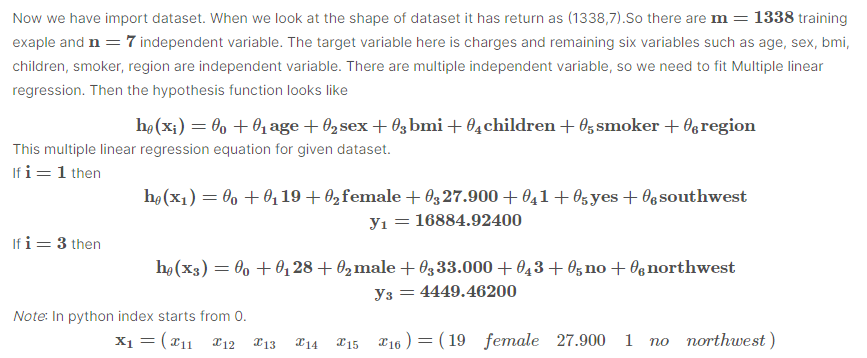

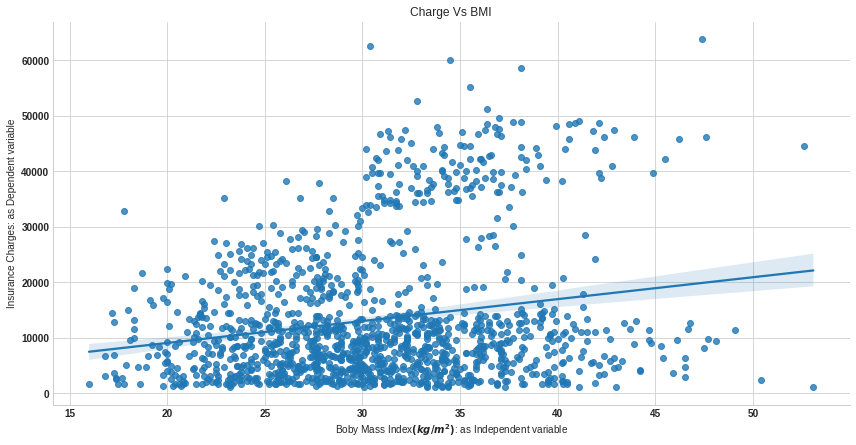

In [ ]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='expenses',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

# Exploratory data analysis

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.484305,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


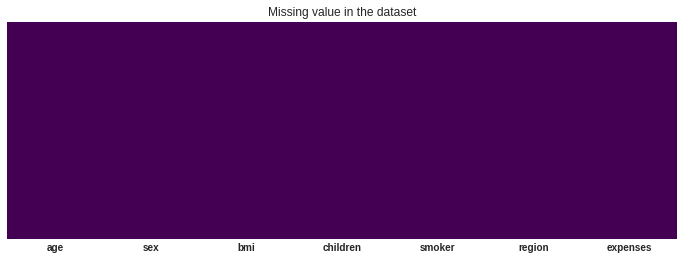

In [ ]:
#Check for missing value¶
#There is no missing value in the data sex
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

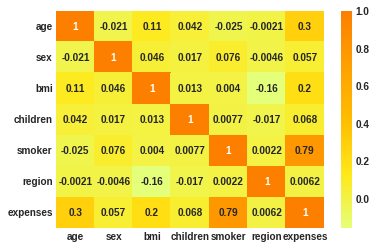

In [ ]:
# correlation plot
#Thier no correlation among valiables.
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

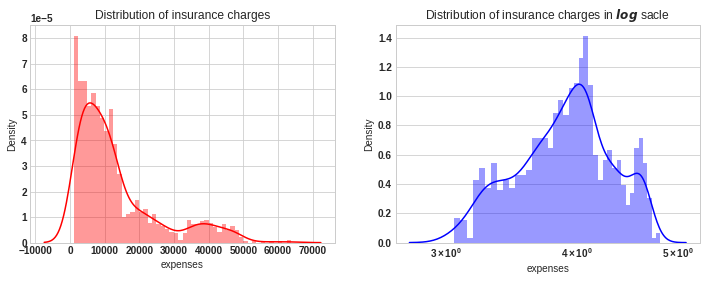

In [ ]:
from pandas._libs.hashtable import mode
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed.  In right plot we will apply natural log, then plot approximately tends to normal.

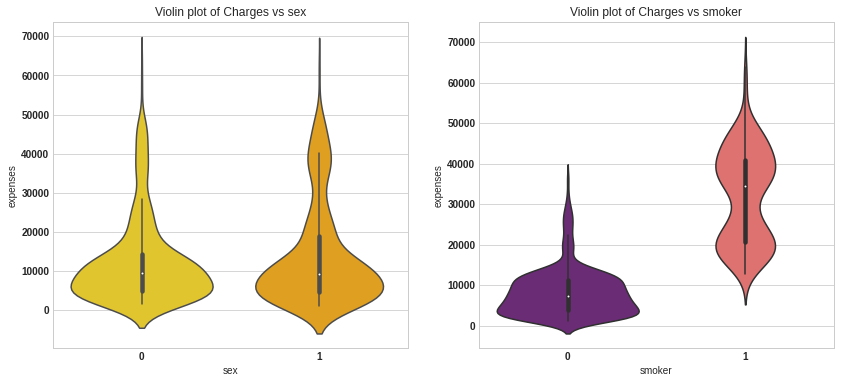

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='expenses',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='expenses',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

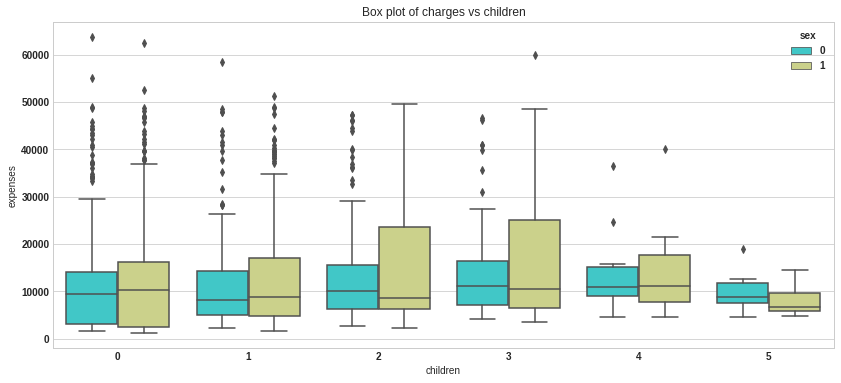

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='expenses',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [ ]:
df.groupby('children').agg(['mean','min','max'])['expenses']


,mean,min,max
children,,,
0,12365.975767,1121.87,63770.43
1,12731.171821,1711.03,58571.07
2,15073.564000,2304.00,49577.66
3,15355.318535,3443.06,60021.40
4,13850.656800,4504.66,40182.25
5,8786.035556,4687.80,19023.26


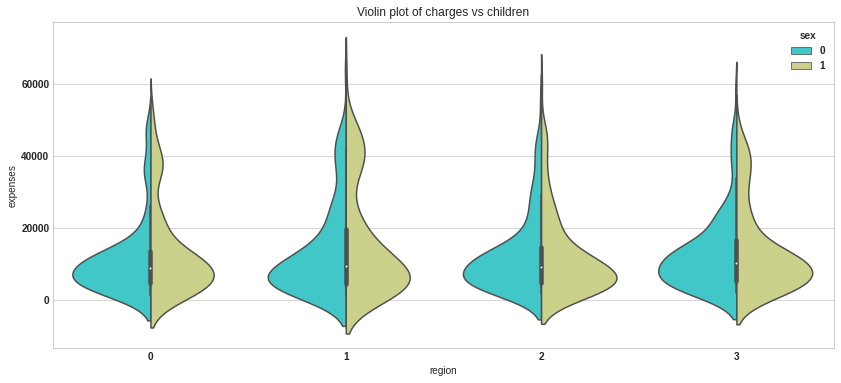

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='expenses',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

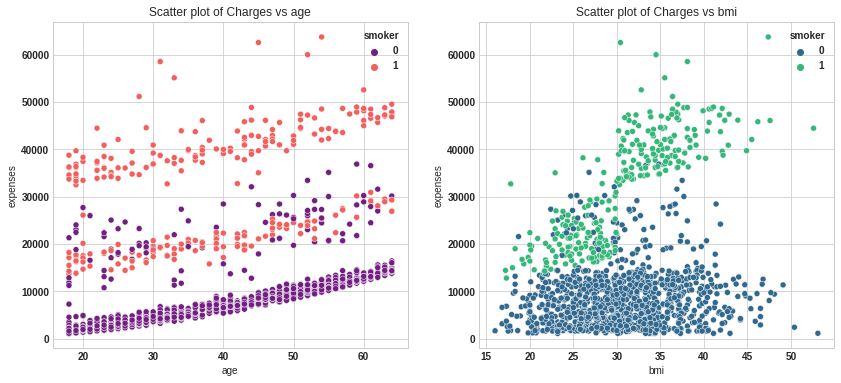

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st  and  2nd  slab, for smoker policy start at  2nd  and  3rd  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2  and maximum upto 54 kg/m2

# Data Preprocessing
## Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1. Label Encoding
2. One hot encoding
3. Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [ ]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8') 


In [ ]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'expenses' 'OHE_1' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_1' 'OHE_1' 'OHE_2' 'OHE_3']

Number of rows and columns in the dataset: (1338, 13)


# Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('expenses',axis=1) # Independet variable
y = df_encode['expenses'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)


# Model building

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

LinearRegression()

In [ ]:
# Finding interception and coefficients
print(lin_reg.intercept_)
print(list(lin_reg.coef_))

-13255.770639799806
[246.24684264877106, 348.1390389005023, -127.75746743347183, 322.6619868677703, 1476.8539871367354, 1197.2638137987026, 3769.045683894416, 1967.3053910965855, 24251.35921165412, 331.65333167773895, 961.0730531023561, 1512.3270642411412]


In [ ]:
# sklearn regression module --Predict on X train data --get mse for training as well as testing
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  35150677.79687562
R square obtain for scikit learn library is : 0.7305391312270824


# Model Validation ( Validate Our Model by checking the assumptions)
In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value

2. The residual error plot should be normally distributed.

3. The mean of residual error should be 0 or close to 0 as much as possible
The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.

4. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  

#**Model creation**

In [ ]:
## defining independent and dependent variables

X=df.iloc[:,0:-1] # independent variables
y=df.expenses  # dependent variable

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2
1334,18,0,31.9,0,0,3
1335,18,0,36.9,0,0,1
1336,21,0,25.8,0,0,0


In [ ]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

**Splitting the data into training data and testing data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (936, 6) (402, 6)


**Model build- linear .fit .predict**

In [ ]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [ ]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_test_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,-13351.308674
1,theta_1,age,245.918494
2,theta_2,sex,-173.694829
3,theta_3,bmi,348.867150
4,theta_4,children,546.965149
5,theta_5,smoker,24233.125587
6,theta_6,region,523.857215


In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_test,y_test) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-13351.308674,-11573.958101
1,theta_1,age,245.918494,284.532250
2,theta_2,sex,-173.694829,104.551454
3,theta_3,bmi,348.867150,282.602488
4,theta_4,children,546.965149,360.801982
5,theta_5,smoker,24233.125587,22742.922019
6,theta_6,region,523.857215,-38.462635


In [ ]:
from sklearn.linear_model import LinearRegression   ## importing the model library

LR=LinearRegression()  ## importing the model object
LR.fit(X_train,y_train) ## fitting the training data

X_test_pred=LR.predict(X_test)

In [ ]:
X_test_pred

array([ 1.14877731e+04,  6.39270509e+03,  3.16443914e+04,  1.00751476e+04,
        8.11474602e+03,  9.37463426e+03,  3.58036513e+04,  8.44200212e+03,
        1.29862552e+04,  3.96963181e+04,  1.57003760e+03,  3.70528413e+04,
        4.23603119e+03,  1.23295902e+04,  8.12466011e+03,  5.08340869e+03,
        5.34574879e+03,  3.53903564e+03,  3.54191393e+04,  3.32153083e+04,
        3.89592753e+04,  1.35040182e+04,  8.18335148e+03,  9.70341614e+03,
        3.59312178e+04,  7.04150591e+03,  5.25724376e+03,  2.93363724e+04,
        5.53744892e+02,  1.13130431e+04,  1.36490379e+04,  4.93607549e+03,
        3.85492920e+03,  1.19632533e+04,  8.94687974e+03,  2.92516937e+04,
        1.11990318e+04,  1.06305560e+04,  9.77379152e+03,  4.46139885e+03,
        1.08536630e+04,  3.43030439e+04,  1.12260998e+04,  3.19051568e+04,
        1.12965665e+04,  1.35177521e+04,  4.39717614e+03,  5.44562932e+03,
        8.69996243e+03,  5.31635139e+03,  1.34565361e+04,  8.95201421e+03,
        1.03455112e+04,  

In [ ]:
y_test

918     13041.92
755      5031.27
207     20984.09
520     25656.58
695      3201.25
          ...   
1302     3208.79
1191    13725.47
1085    19023.26
663      1136.40
977      2902.91
Name: expenses, Length: 402, dtype: float64

In [ ]:
X_train_pred=LR.predict(X_train)

X_train_pred

array([ 8.37338368e+03,  1.27317599e+04,  7.09405759e+03,  9.18770012e+03,
        3.06358032e+04,  3.09943179e+04,  1.83684881e+03,  6.20013842e+03,
        1.52131123e+04,  8.22524033e+03,  3.72393557e+04,  9.48112573e+03,
        1.69745436e+04,  1.23542080e+04,  7.50008020e+03,  3.87973593e+04,
        8.62408179e+03,  1.18948529e+04,  3.20894032e+04,  1.21420212e+04,
        1.37087475e+04,  1.10401968e+04,  4.07001461e+04,  1.39974134e+04,
        3.49941339e+04,  3.32175641e+03,  3.20860750e+04,  3.22974810e+04,
        4.54792591e+03,  2.28140241e+03,  1.13520495e+04,  1.36319879e+04,
        8.16311004e+03,  2.81598683e+03,  2.92518293e+03,  6.85065073e+03,
        1.36959505e+04,  1.26771882e+04,  3.26402604e+04,  3.40648300e+04,
        1.44814317e+04,  8.88663650e+03,  2.23095909e+03,  5.31932195e+02,
        5.93284287e+03,  3.30284724e+04,  2.44884979e+03,  1.12521819e+04,
        9.20428701e+03,  1.30240838e+04,  9.62341924e+03,  7.48390569e+03,
        3.25590856e+04,  

In [ ]:
y_train

923      4320.41
1121     8347.16
713      1984.45
552     12957.12
738     36189.10
          ...   
31       2198.19
950     11534.87
1064     5708.87
742     43254.42
595      8823.99
Name: expenses, Length: 936, dtype: float64

In [ ]:
X_train=LR.predict(X_train)
X_train

array([ 8.37338368e+03,  1.27317599e+04,  7.09405759e+03,  9.18770012e+03,
        3.06358032e+04,  3.09943179e+04,  1.83684881e+03,  6.20013842e+03,
        1.52131123e+04,  8.22524033e+03,  3.72393557e+04,  9.48112573e+03,
        1.69745436e+04,  1.23542080e+04,  7.50008020e+03,  3.87973593e+04,
        8.62408179e+03,  1.18948529e+04,  3.20894032e+04,  1.21420212e+04,
        1.37087475e+04,  1.10401968e+04,  4.07001461e+04,  1.39974134e+04,
        3.49941339e+04,  3.32175641e+03,  3.20860750e+04,  3.22974810e+04,
        4.54792591e+03,  2.28140241e+03,  1.13520495e+04,  1.36319879e+04,
        8.16311004e+03,  2.81598683e+03,  2.92518293e+03,  6.85065073e+03,
        1.36959505e+04,  1.26771882e+04,  3.26402604e+04,  3.40648300e+04,
        1.44814317e+04,  8.88663650e+03,  2.23095909e+03,  5.31932195e+02,
        5.93284287e+03,  3.30284724e+04,  2.44884979e+03,  1.12521819e+04,
        9.20428701e+03,  1.30240838e+04,  9.62341924e+03,  7.48390569e+03,
        3.25590856e+04,  

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
## prediction on training data

train_score=r2_score(y_train,X_train_pred)

In [ ]:
print('Linear Regression training score :',train_score)

Linear Regression training score : 0.7571380593496164


In [ ]:
## prediction on testing data

test_score=r2_score(y_test,X_test_pred)

print('Linear Regression testing score :',test_score)

Linear Regression testing score : 0.7289449239611014


In [ ]:
## mean squared error and mean absolute error of training data

print('MSE:',mean_squared_error(y_train,X_train_pred))
print('MAE:',mean_absolute_error(y_train,X_train_pred))

MSE: 37165094.95429729
MAE: 4214.568474524953


In [ ]:
## mean squared error and mean absolute error of testing data

print('MSE',mean_squared_error(y_test,X_test_pred))
print('MAE',mean_absolute_error(y_test,X_test_pred))

MSE 35358639.2207481
MAE 4045.6229701707884


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Root mean squared error**

In [ ]:
## Root mean squared error

import math
print(math.sqrt(mean_squared_error(y_test,X_test_pred)))

5946.313077928886


In [ ]:
print(math.sqrt(mean_squared_error(y_train,X_train_pred)))

6096.318147398255


In [ ]:
X_train.shape,X_test.shape

((936,), (402, 6))

**Adjusted r2 score**

In [ ]:
## adjusted r2 score

train_adjusted_r2score=1-(1-0.71)*(1003-1)/(1003-6-1)
train_adjusted_r2score

0.7082530120481927

In [ ]:
test_adjusted_r2score=1-(1-0.74)*(335-1)/(335-6-1)
test_adjusted_r2score

0.7352439024390244

**model validation**

In [ ]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  35358639.220748186
R square obtain for normal equation method is : 0.7289449239611008


In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  35358639.2207481
R square obtain for scikit learn library is : 0.7289449239611014


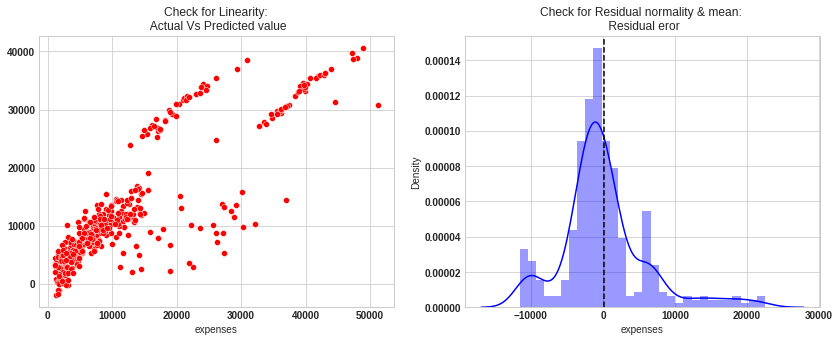

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

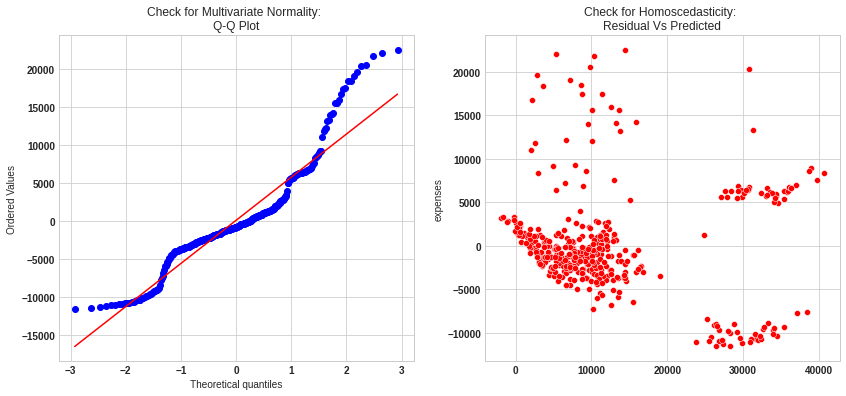

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
x,y
train test split
model build- linear .fit .predict
training vs testing errors - evaluation of model -- mse,rmse,mape,rscore,adjrscore
model validation
model save ---pickle

SyntaxError: ignored